Riskified fraud detection project

In [1]:
#loading the desired libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the excel data file

In [47]:
df=pd.read_excel("Technical Interview Dataset.xlsx")

In [5]:
#checking missing values in the file

In [6]:
print(df.isnull().sum())

order_id                0
order_date              0
order_status            0
price                   0
digital_product         0
customer_account_age    0
order_source            0
billing_zip             0
shipping_name_length    0
classification_score    0
dtype: int64


In [7]:
#checking the structure and datatype of the file

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40825 entries, 0 to 40824
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              40825 non-null  int64         
 1   order_date            40825 non-null  datetime64[ns]
 2   order_status          40825 non-null  object        
 3   price                 40825 non-null  float64       
 4   digital_product       40825 non-null  bool          
 5   customer_account_age  40825 non-null  int64         
 6   order_source          40825 non-null  object        
 7   billing_zip           40825 non-null  object        
 8   shipping_name_length  40825 non-null  int64         
 9   classification_score  40825 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 2.8+ MB


In [9]:
df.describe()

,order_id,order_date,price,customer_account_age,shipping_name_length,classification_score
count,4.082500e+04,40825,40825.000000,40825.000000,40825.000000,40825.000000
mean,9.288490e+08,2019-06-15 20:29:35.970606080,396.114069,736.804556,4.036375,0.943287
min,9.068728e+08,2019-06-01 00:00:00,0.000000,-3.000000,0.000000,0.038408
25%,9.200580e+08,2019-06-10 00:00:00,35.000000,0.000000,0.000000,0.988642
50%,9.291292e+08,2019-06-16 00:00:00,82.440000,214.000000,0.000000,0.999177
75%,9.377158e+08,2019-06-22 00:00:00,280.210000,980.000000,10.000000,0.999895
max,9.505111e+08,2019-07-01 00:00:00,11033.310000,6298.000000,21.000000,1.000000
std,1.152215e+07,NaN,771.641853,1171.305366,5.901319,0.168241


In [10]:
df.head()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score
0,945827823,2019-06-28,approved,16.44,False,759,web,98109,9,1.000000
1,932303597,2019-06-18,approved,150.00,True,894,web,52761,0,0.999999
2,916501223,2019-06-07,approved,105.94,False,5160,web,60047,10,0.999999
3,916516038,2019-06-07,approved,100.00,True,1267,web,46516,0,0.999999
4,925554558,2019-06-13,approved,225.00,True,889,web,52761,0,0.999999


In [11]:
df.tail()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score
40820,945268544,2019-06-28,approved,380.95,True,4212,web,77004,0,0.047780
40821,925515200,2019-06-13,approved,55.95,True,624,web,98662,0,0.047733
40822,941810752,2019-06-25,approved,109.95,True,797,web,85364,0,0.047702
40823,927379852,2019-06-15,approved,25.95,True,0,web,32117,0,0.047614
40824,933544726,2019-06-19,approved,0.00,False,18,web,91411,12,0.038408


                                                        ---TASK 1---

In [12]:
#Task 1 : Rely exclusively on model scores, and set a threshold such that 90% of orders would be approved

In [13]:
#so for setting a threshold we have to take the 10th percentile of the classification score  that will approve the 90% of the orders

In [14]:
threshold = df['classification_score'].quantile(.10)  #calculating the threshold

In [15]:
print("score Threshold for 90% orders approval:",threshold)

score Threshold for 90% orders approval: 0.8608025151521428


In [16]:
df['Model_decision']=df['classification_score'].apply(lambda x: 'Approve'if x > threshold else 'decline') #creating a new column of model decision

In [17]:
df.head()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score,Model_decision
0,945827823,2019-06-28,approved,16.44,False,759,web,98109,9,1.000000,Approve
1,932303597,2019-06-18,approved,150.00,True,894,web,52761,0,0.999999,Approve
2,916501223,2019-06-07,approved,105.94,False,5160,web,60047,10,0.999999,Approve
3,916516038,2019-06-07,approved,100.00,True,1267,web,46516,0,0.999999,Approve
4,925554558,2019-06-13,approved,225.00,True,889,web,52761,0,0.999999,Approve


                                                        ---TASK 2---

In [18]:
#2. Plot the model scores distribution & comment on what you’re seeing

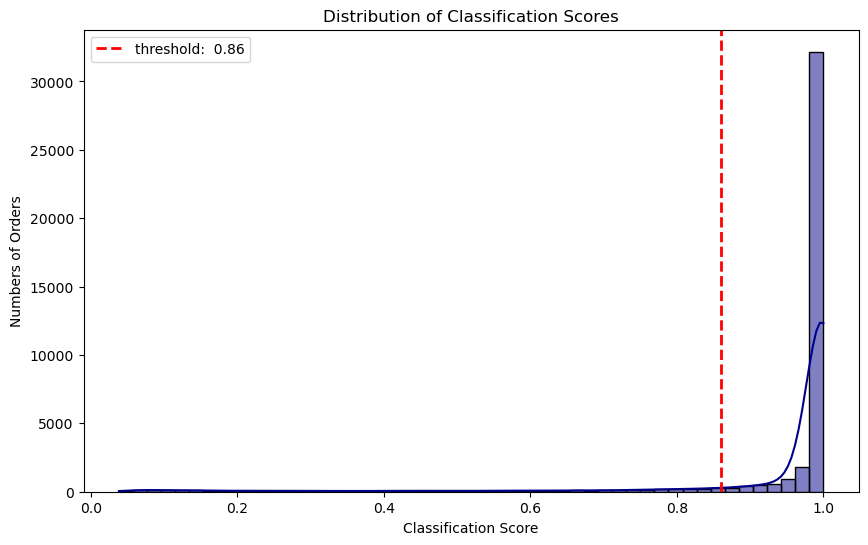

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['classification_score'], bins=50, kde= True, color='darkblue')
plt.axvline(threshold, color='red', linestyle="--", linewidth=2, label=f'threshold: {threshold: .2f}')
plt.title("Distribution of Classification Scores")
plt.xlabel("Classification Score")
plt.ylabel("Numbers of Orders")
plt.legend()
plt.show()

most of the classification score are clustered very close to 1.0

                                                        ---TASK 3---

What fee do we have to collect (as a percentage) in order for the ratio of chargeback sum we approve to revenue we collect (chargeback sum / revenue) to be 50% at the 90% approval rate?

In [20]:
df.head()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score,Model_decision
0,945827823,2019-06-28,approved,16.44,False,759,web,98109,9,1.000000,Approve
1,932303597,2019-06-18,approved,150.00,True,894,web,52761,0,0.999999,Approve
2,916501223,2019-06-07,approved,105.94,False,5160,web,60047,10,0.999999,Approve
3,916516038,2019-06-07,approved,100.00,True,1267,web,46516,0,0.999999,Approve
4,925554558,2019-06-13,approved,225.00,True,889,web,52761,0,0.999999,Approve


In [21]:
df['order_status'].value_counts()

order_status
approved      40465
chargeback      360
Name: count, dtype: int64

In [22]:
# Finding the total 'chargeback' amount from 90% of the approved orders
chargeback_sum=df[(df['order_status']=='chargeback') & (df['Model_decision']=='Approve')]['price'].sum()


In [23]:
print(chargeback_sum)

15092.940000000002


In [24]:
# Finding the sum of amount from all the approved orders based on the threshold value calculated above
Total_approved_order_value=df[df['Model_decision']=='Approve']['price'].sum()

In [25]:
print(Total_approved_order_value)

15411656.269999998


In [26]:
#We want chargeback sum to be 50% of revenue:
required_revenue = chargeback_sum/.50
print(required_revenue)

30185.880000000005


In [27]:
fee_percent = (required_revenue / Total_approved_order_value) * 100

# Print the result
print(f"fee_percent={fee_percent:.2f}%")

fee_percent=0.20%


                                                        ---TASK 4---

In the dataset, there’s a column indicating whether the purchased goods are digital or 
tangible. What can you say about the risk level of each segment?


In [28]:
#we will analyze risk (chargeback rate) for digital vs tangible:

In [29]:
df.columns

Index(['order_id', 'order_date', 'order_status', 'price', 'digital_product',
       'customer_account_age', 'order_source', 'billing_zip',
       'shipping_name_length', 'classification_score', 'Model_decision'],
      dtype='object')

In [30]:
df.head()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score,Model_decision
0,945827823,2019-06-28,approved,16.44,False,759,web,98109,9,1.000000,Approve
1,932303597,2019-06-18,approved,150.00,True,894,web,52761,0,0.999999,Approve
2,916501223,2019-06-07,approved,105.94,False,5160,web,60047,10,0.999999,Approve
3,916516038,2019-06-07,approved,100.00,True,1267,web,46516,0,0.999999,Approve
4,925554558,2019-06-13,approved,225.00,True,889,web,52761,0,0.999999,Approve


In [31]:
#now we are comparing the count of approved and chargeback orders for digital and tangible products

<Axes: xlabel='digital_product', ylabel='count'>

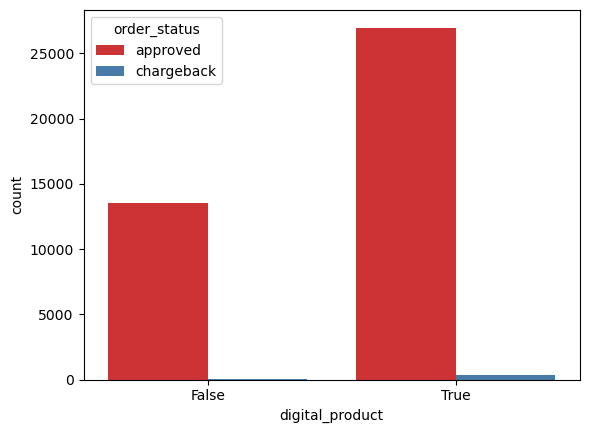

In [32]:
sns.countplot(x='digital_product', hue='order_status', data=df, palette='Set1')

In [33]:
digital=df[df['digital_product']== True]['order_status'].value_counts()    #digital products
print(digital)

order_status
approved      26967
chargeback      320
Name: count, dtype: int64


In [34]:
tangible=df[df['digital_product']== False]['order_status'].value_counts()     #tangible products

print(tangible)

order_status
approved      13498
chargeback       40
Name: count, dtype: int64


### **Observation:**

The plot and calculations clearly show the variation in approved and chargeback orders for digital and tangible products. The **chargeback portion is significantly higher for digital products** compared to tangible ones.

This indicates that **digital products carry a much higher risk**, as they are more frequently associated with chargebacks. On the other hand, **tangible products have fewer or minimal chargebacks**, suggesting they are comparatively safer.

__Tangible products are less risky__

__Digital products are riskier__


                                                        ---TASK 5---

Free exploration - Provide 2-3 interesting breakdowns or insights, keeping in mind 
Riskified’s goal is to prevent fraud.

                                        **impact of Customer_account_age on charged_back orders**

In [35]:
#Finding the impact of Customer_account_age on charged_back orders

<Axes: xlabel='order_status', ylabel='customer_account_age'>

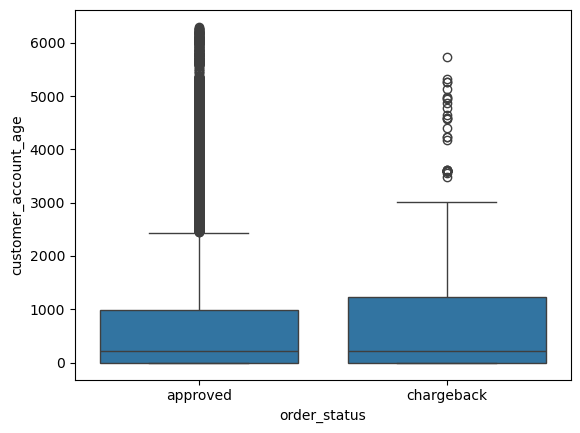

In [36]:
sns.boxplot(x='order_status', y='customer_account_age', data=df)


The analysis shows that as customer_account_age increases, the likelihood of chargebacks decreases.
This indicates that **newly created accounts are significantly more prone to fraudulent activity**.

**To mitigate this risk:**

Define a **threshold for customer_account_age**.

For accounts below the threshold: **Apply stricter fraud screening rules** (e.g., manual review, higher fraud score threshold).

you can **charge a slightly higher fee on such orders** to cover possible losses from fraud.

**Flag high-value transactions from new accounts** for additional verification.

                            **variations in chargeback orders for different order source**

In [37]:
#Finding the number of  approved and chargeback orders based on order_source

<Axes: xlabel='order_source', ylabel='count'>

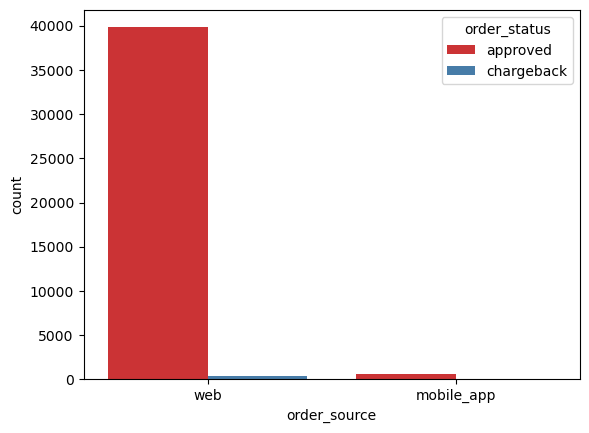

In [38]:
sns.countplot(x='order_source', hue='order_status', data=df, palette='Set1')


In [39]:
df[df['order_source']=='mobile_app']['order_status'].value_counts()

order_status
approved      663
chargeback     11
Name: count, dtype: int64

In [40]:
11/663

0.016591251885369532

In [41]:
df[df['order_source']=='web']['order_status'].value_counts()

order_status
approved      39802
chargeback      349
Name: count, dtype: int64

In [42]:
349/39802

0.008768403597809156

The above analysis indicates that **orders placed via the mobile app have a higher tendency to result in chargebacks**.
Applying a **slightly higher fee to mobile app transactions**, compared to web orders, could be an effective strategy to help **minimize fraud risk**.

**To mitigate this risk, Riskified could consider:**

Implementing stricter fraud checks for mobile app orders.

Adjusting the fee structure to reflect the higher risk, by applying a slightly higher fee to mobile app transaction

Prioritizing model optimization or rule-based flags for mobile-originated high-value or new-user orders



                                            **impact of order_price on charged_back orders**

In [43]:
#Finding the impact of order_price on charged_back orders

<Axes: xlabel='order_status', ylabel='price'>

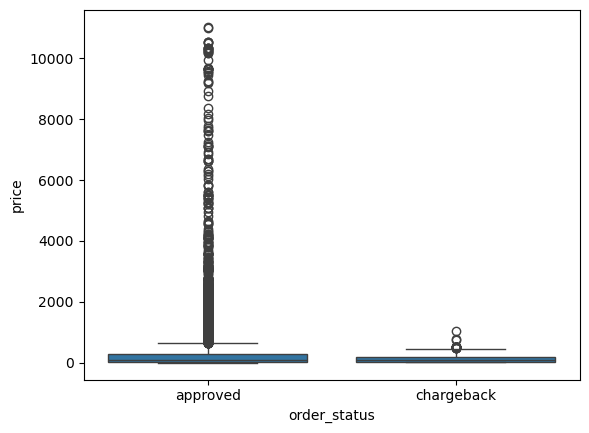

In [44]:
sns.boxplot(x='order_status', y='price', data=df)


In [45]:
df[df['order_status'].str.lower() == 'chargeback']['price'].max()


1033.73

**The plot and data show that all chargeback orders have a price of ₹1033.73 or less.**  
This means **fraud usually happens on lower-priced orders**, maybe because it’s **easier to avoid being noticed**.

We can try to mititgate it by:

Set stricter fraud rules or checks for orders below ₹1100.

Use machine learning or rules-based models to flag low-value, high-risk patterns.

Consider reviewing frequent low-value orders from new accounts or risky sources.